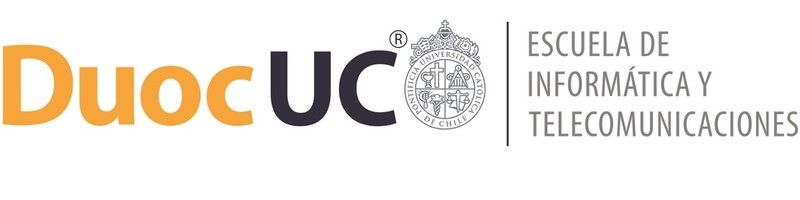

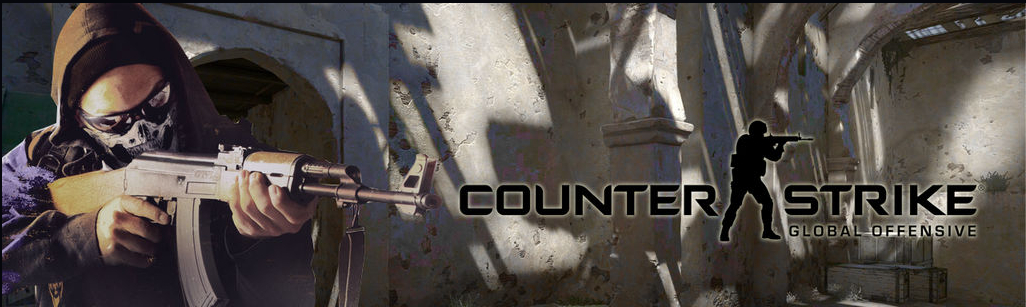

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Alvaro Flores, Aurora Mansilla, Ricardo Ojeda, Ella Zampeze

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

# Hipótesis

 El tipo de arma principal se relaciona con el tiempo de vida del jugador. Se hará un conteo de la probabilidad de supervivencia clasificando por el tipo de arma, así se realizará la comparación entre datos (clasificación).

## Fase 2: Data Understanding

In [3]:
import pandas as pd
from google.colab import files
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree

In [5]:


# Subir archivo CSV
uploaded = files.upload()

# Leer el dataset con separador ";"
df = pd.read_csv("Anexo ET_demo_round_traces_2022 (1).csv", sep=";")

# Vista general del dataset
print(f"") #----
print(df.shape)
print(f"") #----
print(df.columns)
print(f"") #----
df.head()
print(f"") #----
df.describe()

Saving Anexo ET_demo_round_traces_2022 (1).csv to Anexo ET_demo_round_traces_2022 (1) (1).csv

(79157, 30)

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')




/tmp/ipython-input-5-3820368294.py:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces_2022 (1).csv", sep=";")


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [6]:
# Ver si hay valores nulos
df.isnull().sum()

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


# Fase 3: Data Preparation | Limpieza general

In [7]:
# Copiar dataset original
df_clean = df[df["AbnormalMatch"] == False].copy()  # Eliminar partidas con error de red

# Limpiar y convertir TimeAlive a segundos (dividir por 1e14)
# NOTA: una ronda normal en CS:GO dura en promedio entre 15 y 155 segundos
df_clean["TimeAlive"] = df_clean["TimeAlive"].str.replace(".", "", regex=False)
df_clean["TimeAlive"] = pd.to_numeric(df_clean["TimeAlive"], errors="coerce") / 1e14

# Filtrar valores de TimeAlive fuera del rango normal de una ronda
df_clean = df_clean[(df_clean["TimeAlive"] >= 15) & (df_clean["TimeAlive"] <= 155)]

# Limpiar y convertir TravelledDistance (remover puntos y convertir a metros)
# NOTA: un jugador en CS:GO puede recorrer de 10 a 150 metros aprox.
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
df_clean["TravelledDistance"] = pd.to_numeric(df_clean["TravelledDistance"], errors="coerce") / 1e15

# Eliminar outliers en RoundStartingEquipmentValue usando IQR
Q1 = df_clean["RoundStartingEquipmentValue"].quantile(0.25)
Q3 = df_clean["RoundStartingEquipmentValue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean["RoundStartingEquipmentValue"] >= lower_bound) &
    (df_clean["RoundStartingEquipmentValue"] <= upper_bound)
]


/tmp/ipython-input-7-2597337017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
/tmp/ipython-input-7-2597337017.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
/tmp/ipython-input-7-2597337017.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [8]:
print(df_clean[["TimeAlive", "TravelledDistance"]].describe()) # revisamos cómo afectó esta limpieza a las columnas 'TimeAlive' y 'TravelledDistance'.

          TimeAlive  TravelledDistance
count  56214.000000       56214.000000
mean      75.080981          11.881881
std       27.673434          12.302108
min       15.033467           0.000000
25%       52.192211           5.462743
50%       74.951775           9.088984
75%       95.410775          13.355638
max      154.548722          65.530265


# Trabajo de limpieza sobre dato erróneo (Jugador 629)

In [9]:
# Se analiza RoundWinner y MatchWinner en busca valores distintos y se pasan a booleano
print(df['RoundWinner'].unique())
print(df['MatchWinner'].unique())
nulos_matchwinner = df['MatchWinner'].isnull().sum()
print(f"Cantidad de valores NaN en MatchWinner: {nulos_matchwinner}")

['False' 'True' 'False4' True False]
[True False nan]
Cantidad de valores NaN en MatchWinner: 1


In [10]:
df_clean = df_clean.rename(columns={'Unnamed: 0': 'id'})

In [11]:
# Encontrar la fila donde se encuentra el valor 'False4'
errores_roundwinner = df_clean[df_clean['RoundWinner'] == 'False4']

# Mostrar las columnas afectadas
print(errores_roundwinner[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner']])

     id         Map  InternalTeamId  MatchId  RoundId RoundWinner
29  629  de_inferno               2        4        3      False4


In [12]:
# Buscar todos los jugadores de MatchId=4 y RoundId=3 y las columnas afectadas
ronda_especifica = df_clean[
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3)
]
print(ronda_especifica[['id', 'InternalTeamId', 'RoundWinner']])

     id  InternalTeamId RoundWinner
21  621               1        True
22  622               1        True
24  624               1        True
25  625               2       False
26  626               2       False
27  627               2       False
28  628               2       False
29  629               2      False4


In [13]:
# Se cambia dato de 'False4' por 'False' al jugador correspondiente.
df_clean.loc[
    (df_clean['id'] == 629) &
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3),
    'RoundWinner'
] = False

# Mapear los valores para corregir 'True' y 'False' como booleanos reales
df_clean['RoundWinner'] = df_clean['RoundWinner'].map({
    'True': True,
    'False': False,
    True: True,
    False: False
})

# Volver a listar los valores únicos de RoundWinner
print(df_clean['RoundWinner'].unique())

[False  True]


# Tratamiento de nulos

#### Previamente pudimos observar cómo habian datos nulos en las columnas 'Team' y 'MatchWinner'. Estos valores serán tratados a continuación:

In [14]:
print(df_clean['MatchWinner'].unique())
print(df_clean['Team'].unique())

[True False nan]
['Terrorist' 'CounterTerrorist' nan]


In [15]:
# Mostrar la fila que tiene MatchWinner nulo
fila_matchwinner_nulo = df_clean[df_clean['MatchWinner'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

print(f"")
# Mostrar las filas que tiene Team nulo
fila_matchwinner_nulo = df_clean[df_clean['Team'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId MatchWinner
29  629  de_inferno               2        4        3         NaN

     id         Map Team  InternalTeamId  MatchId  RoundId MatchWinner
13  613  de_inferno  NaN               1        4        2        True
27  627  de_inferno  NaN               2        4        3       False


## Tratamiento para el valor nulo en 'MatchWinner'
Previamente nos encontramos con el mismo jugador 629 el cual presentaba problemas de error de tipeo en un dato False.

Los datos que ahora tenemos para el tratamiento del nulo es:

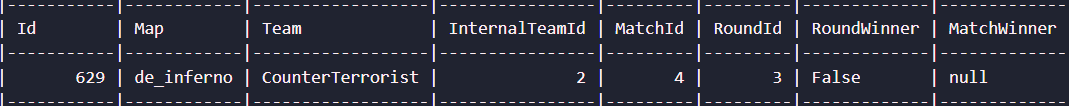

In [16]:
# Filtrar todas las filas del MatchId 4
partida = df_clean[df_clean['MatchId'] == 4]

# Analizar qué equipo ganó más rondas
rondas_ganadas = partida.groupby('Team')['RoundWinner'].sum()

print(rondas_ganadas)

Team
CounterTerrorist    21
Terrorist           63
Name: RoundWinner, dtype: int64


In [17]:
# Dado que el jugador 629 tiene como 'Team' CounterTerrorist ahora podemos agregar el valor correspondiente en 'MatchWinner', es decir, False
df_clean.loc[
    (df_clean['id'] == 629),
    'MatchWinner'
] = False

In [18]:
# Verificamos los nuevos valores
print(df_clean.loc[(df_clean['id'] == 629) & (df_clean['MatchId'] == 4), ['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId  RoundWinner MatchWinner
29  629  de_inferno               2        4        3        False       False


# Tratamiento de valores nulos en 'Team'

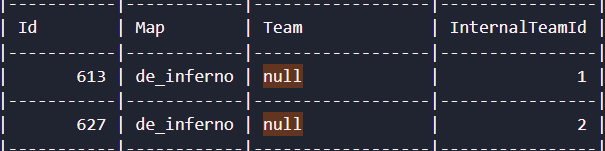

In [19]:
# Mostrar las combinaciones únicas entre InternalTeamId y Team
combinaciones = df_clean[["MatchId", "InternalTeamId", "Team"]].drop_duplicates()
display(combinaciones.sort_values(["InternalTeamId", "Team"]))

# Contar cuántas veces cada InternalTeamId se asocia a cada Team
conteo = df_clean.groupby(["InternalTeamId", "Team"]).size().reset_index(name='Cantidad')
display(conteo.sort_values("InternalTeamId"))

# Verificar si dentro de una misma partida (MatchId) los equipos cambian su rol (T o CT)
cambio_en_partidas = df_clean.groupby(["MatchId", "InternalTeamId", "Team"]).size().reset_index(name='Recuento')
display(cambio_en_partidas.sort_values(["MatchId", "InternalTeamId"]))

# Identificar casos donde el mismo InternalTeamId se asocia a ambos bandos en distintas partidas
pivot = conteo.pivot(index="InternalTeamId", columns="Team", values="Cantidad")
display(pivot)

,MatchId,InternalTeamId,Team
153,4,1,CounterTerrorist
343,6,1,CounterTerrorist
539,9,1,CounterTerrorist
783,10,1,CounterTerrorist
899,11,1,CounterTerrorist
...,...,...,...
78032,505,2,Terrorist
78255,506,2,Terrorist
78692,509,2,Terrorist
78962,510,2,Terrorist


,InternalTeamId,Team,Cantidad
0,1,CounterTerrorist,11015
1,1,Terrorist,17006
2,2,CounterTerrorist,17199
3,2,Terrorist,10992


,MatchId,InternalTeamId,Team,Recuento
0,4,1,CounterTerrorist,32
1,4,1,Terrorist,52
2,4,2,CounterTerrorist,59
3,4,2,Terrorist,31
4,6,1,CounterTerrorist,4
...,...,...,...,...
1304,510,1,Terrorist,56
1305,510,2,CounterTerrorist,54
1306,510,2,Terrorist,47
1307,511,1,Terrorist,14


Team,CounterTerrorist,Terrorist
InternalTeamId,,
1,11015,17006
2,17199,10992


In [20]:
# Filtramos los valores de matchid 510 donde internal team id 2 es terrorist y counterterrorist
filtered_df = df_clean[
    (df_clean['MatchId'] == 510) &
    (
        (df_clean['InternalTeamId'] == 2) &
        ((df_clean['Team'] == 'Terrorist') | (df_clean['Team'] == 'CounterTerrorist'))
    )
]

print(filtered_df[['MatchId', 'InternalTeamId', 'Team']])

       MatchId  InternalTeamId              Team
78812      510               2  CounterTerrorist
78814      510               2  CounterTerrorist
78815      510               2  CounterTerrorist
78816      510               2  CounterTerrorist
78822      510               2  CounterTerrorist
...        ...             ...               ...
79093      510               2         Terrorist
79094      510               2         Terrorist
79095      510               2         Terrorist
79096      510               2         Terrorist
79106      510               2         Terrorist

[101 rows x 3 columns]


## Justificación para imputación de valores nulos en Team

Durante el análisis del MatchId = 4, se identificaron dos jugadores con valores nulos en la columna Team, los cuales fueron imputados de forma razonada:

* **Jugador con Id = 627:**
A pesar de tener Team = NaN, comparte InternalTeamId = 2 con otros jugadores clasificados como "CounterTerrorist". Además, su valor de MatchKills = 2 y RoundKills = 1 sugiere que había participado en rondas previas. Comparando con el jugador Id = 617, que tiene las kills complementarias en la misma partida y equipo, se concluye que ambos registros corresponden al mismo jugador reconectado, validando así la imputación como "CounterTerrorist".

* **Jugador con Id = 613:**
Posee TeamStartingEquipmentValue = 1300, valor que comparte con otros cuatro jugadores clasificados como "Terrorist" en el mismo MatchId. Además, su InternalTeamId = 1 concuerda con el equipo Terrorist en dicha partida. Por lo tanto, se imputa razonablemente como "Terrorist".

Estas imputaciones permiten mantener la integridad de las variables categóricas sin introducir sesgo, apoyadas tanto por patrones de juego como por estadísticas internas del dataset.

In [21]:
# Luego de todo el análisis podemos agregar los valores concordantes
df_clean.loc[
    (df_clean['id'] == 627),
    'Team'
] = 'CounterTerrorist'

df_clean.loc[
    (df_clean['id'] == 613),
    'Team'
] = 'Terrorist'

In [22]:
# Verificar si hay valores nulos en las columnas 'Team' y 'MatchWinner' después de la limpieza
print("\nValores nulos después del tratamiento:")
print(df_clean[['Team', 'MatchWinner']].isnull().sum())


Valores nulos después del tratamiento:
Team           0
MatchWinner    0
dtype: int64


## Conclusión del análisis:
 El campo *InternalTeamId* puede asignarse tanto a *Terrorist* como a *CounterTerrorist*, según la partida (*MatchId*) y la ronda específica (*RoundId*).

 Por ejemplo, en el *MatchId = 510*, entre las rondas 1 a 15, *Terrorist = 1* y *CounterTerrorist = 2*, mientras que de la ronda 16 a la 30, los valores se invierten (*Terrorist = 2*, *CounterTerrorist = 1*). Por lo tanto, para un análisis preciso, es necesario contrastar este dato con otras columnas.


 #### **Recomendación:**
  A la hora de analizar los datos, resulta más conveniente y confiable utilizar el campo *Team* en lugar de *InternalTeamId*, ya que este último puede variar dentro de una misma partida, mientras que Team mantiene una asignación consistente (*Terrorist* o *CounterTerrorist*) sin depender de cambios internos.

In [23]:
def determinar_arma_principal(row):
    armas = {
        "AssaultRifle": row["PrimaryAssaultRifle"],
        "SniperRifle": row["PrimarySniperRifle"],
        "Heavy": row["PrimaryHeavy"],
        "SMG": row["PrimarySMG"],
        "Pistol": row["PrimaryPistol"]
    }
    return max(armas, key=armas.get)

df["arma_principal"] = df.apply(determinar_arma_principal, axis=1)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Codificar 'arma_principal'
le = LabelEncoder()
df["arma_principal_encoded"] = le.fit_transform(df["arma_principal"])

# Variable objetivo
y = df["Survived"].astype(int)

# Variables predictoras (puedes agregar más si querés)
X = df[["arma_principal_encoded", "RoundKills", "RoundAssists", "RoundHeadshots", "RoundFlankKills"]]

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Divide los datos en entrenamiento (75%) y prueba (25%). random_state=0 asegura resultados reproducibles.

# Modelo Random Forest con Gini
rf = RandomForestClassifier(criterion="gini", n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

#Entrena un Random Forest con:
#10 árboles
#Entropía como criterio de división (en lugar de Gini)

# Predicciones y evaluación
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11560  2656]
 [ 4985  4547]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     14216
           1       0.63      0.48      0.54      9532

    accuracy                           0.68     23748
   macro avg       0.66      0.65      0.65     23748
weighted avg       0.67      0.68      0.67     23748



=== Métricas de Evaluación ===
Precisión: 0.6713
AUC-ROC: 0.7038

Matriz de Confusión:
[[10499  3717]
 [ 4088  5444]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     14216
           1       0.59      0.57      0.58      9532

    accuracy                           0.67     23748
   macro avg       0.66      0.65      0.66     23748
weighted avg       0.67      0.67      0.67     23748


Error OOB: 0.3316

Importancia de características basada en Gini:
                  Feature  Gini Importance
1              RoundKills         0.608497
0  arma_principal_encoded         0.155452
3          RoundHeadshots         0.142603
4         RoundFlankKills         0.050343
2            RoundAssists         0.043104


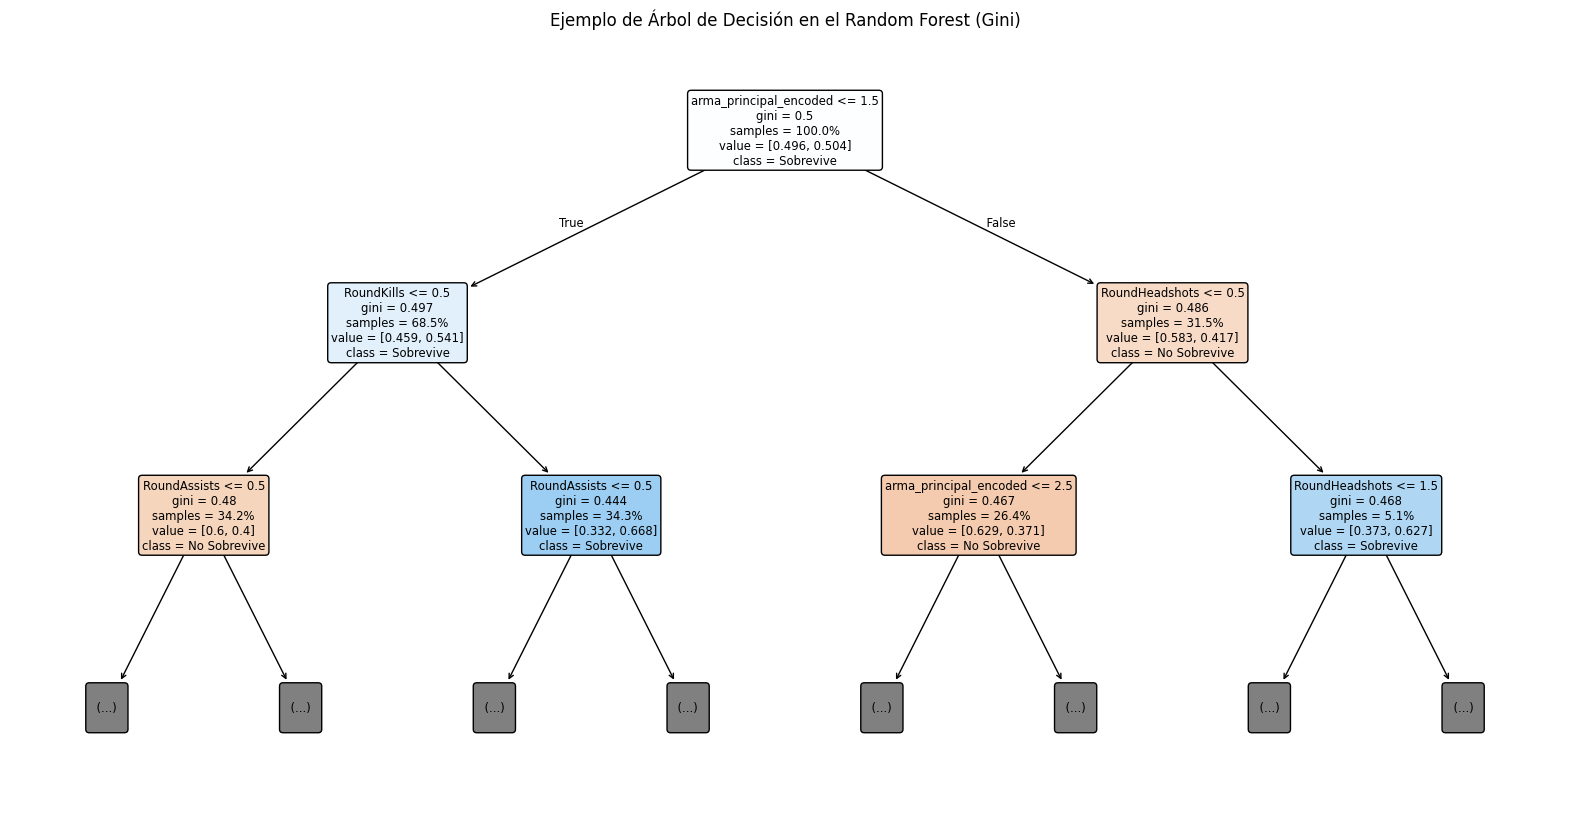

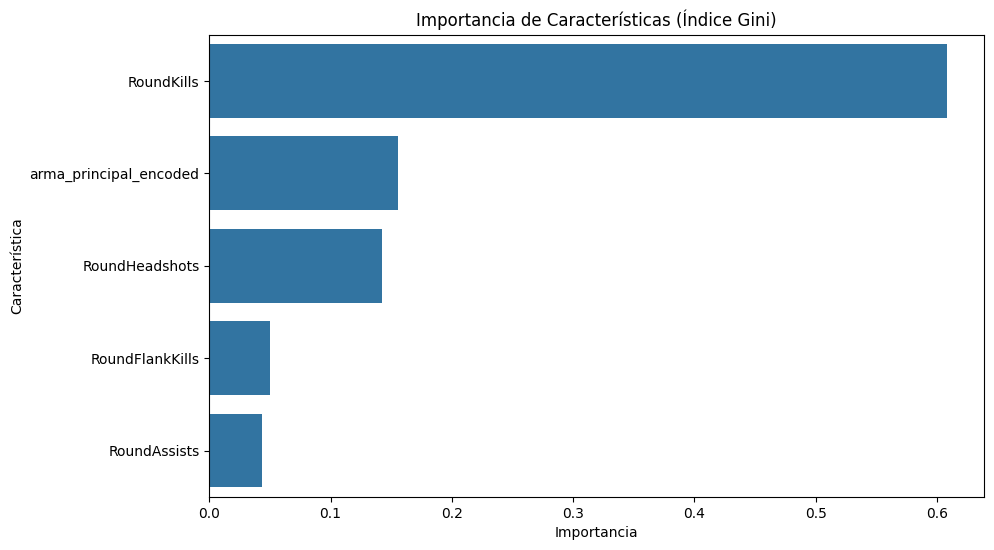


Probabilidad predicha de supervivencia por tipo de arma:
arma_principal
SMG             0.622664
SniperRifle     0.592920
Heavy           0.531178
AssaultRifle    0.528595
Pistol          0.315548
Name: pred_proba, dtype: float64


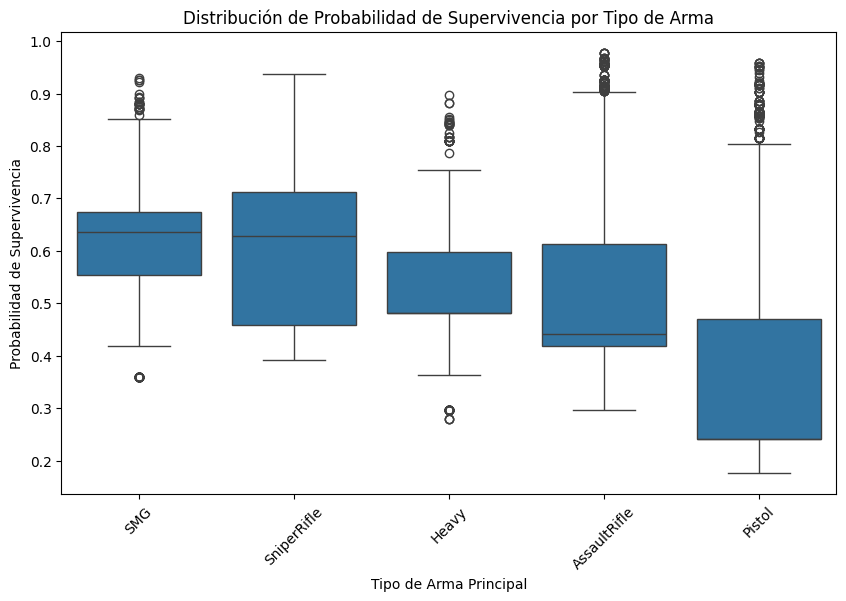

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de datos
def determinar_arma_principal(row):
    armas = {
        "AssaultRifle": row["PrimaryAssaultRifle"],
        "SniperRifle": row["PrimarySniperRifle"],
        "Heavy": row["PrimaryHeavy"],
        "SMG": row["PrimarySMG"],
        "Pistol": row["PrimaryPistol"]
    }
    return max(armas, key=armas.get)

df["arma_principal"] = df.apply(determinar_arma_principal, axis=1)

# Codificación de variables categóricas
le = LabelEncoder()
df["arma_principal_encoded"] = le.fit_transform(df["arma_principal"])

# Variable objetivo y predictores
y = df["Survived"].astype(int)
X = df[["arma_principal_encoded", "RoundKills", "RoundAssists", "RoundHeadshots", "RoundFlankKills"]]

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modelo Random Forest con criterio Gini
rf_gini = RandomForestClassifier(
    criterion="gini",           # Usando el índice Gini para medir la calidad de las divisiones
    n_estimators=100,           # Número de árboles en el bosque
    max_depth=7,                # Profundidad máxima de los árboles
    min_samples_split=5,       # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=5,         # Mínimo número de muestras en un nodo hoja
    max_features='sqrt',        # Número de características a considerar en cada división
    random_state=42,            # Semilla para reproducibilidad
    class_weight='balanced',    # Balancear clases si es necesario
    oob_score=True              # Calcular error OOB (out-of-bag)
)

# Entrenamiento del modelo
rf_gini.fit(X_train, y_train)

# 4. Evaluación del modelo
y_pred = rf_gini.predict(X_test)
y_proba = rf_gini.predict_proba(X_test)[:, 1]

print("=== Métricas de Evaluación ===")
print(f"Precisión: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"\nError OOB: {1 - rf_gini.oob_score_:.4f}")

# 5. Análisis de importancia de características (Gini Importance)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Gini Importance': rf_gini.feature_importances_
}).sort_values(by='Gini Importance', ascending=False)

print("\nImportancia de características basada en Gini:")
print(feature_importances)

# 6. Visualización de un árbol individual (primer árbol del bosque)
plt.figure(figsize=(20, 10))
plot_tree(rf_gini.estimators_[0],
          feature_names=X.columns,
          class_names=['No Sobrevive', 'Sobrevive'],
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=2)  # Limitamos la profundidad para visualización
plt.title("Ejemplo de Árbol de Decisión en el Random Forest (Gini)")
plt.show()

# 7. Visualización de importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Gini Importance', y='Feature', data=feature_importances)
plt.title('Importancia de Características (Índice Gini)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# 8. Análisis de supervivencia por tipo de arma
df['pred_proba'] = rf_gini.predict_proba(df[X.columns])[:, 1]
arma_survival = df.groupby('arma_principal')['pred_proba'].mean().sort_values(ascending=False)

print("\nProbabilidad predicha de supervivencia por tipo de arma:")
print(arma_survival)

plt.figure(figsize=(10, 6))
sns.boxplot(x='arma_principal', y='pred_proba', data=df, order=arma_survival.index)
plt.title('Distribución de Probabilidad de Supervivencia por Tipo de Arma')
plt.ylabel('Probabilidad de Supervivencia')
plt.xlabel('Tipo de Arma Principal')
plt.xticks(rotation=45)
plt.show()

In [26]:
from scipy.stats import f_oneway
groups = [df[df['arma_principal']==arma]['pred_proba'] for arma in df['arma_principal'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value: {p_value:.4f}")

ANOVA p-value: 0.0000


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(rf_gini, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}


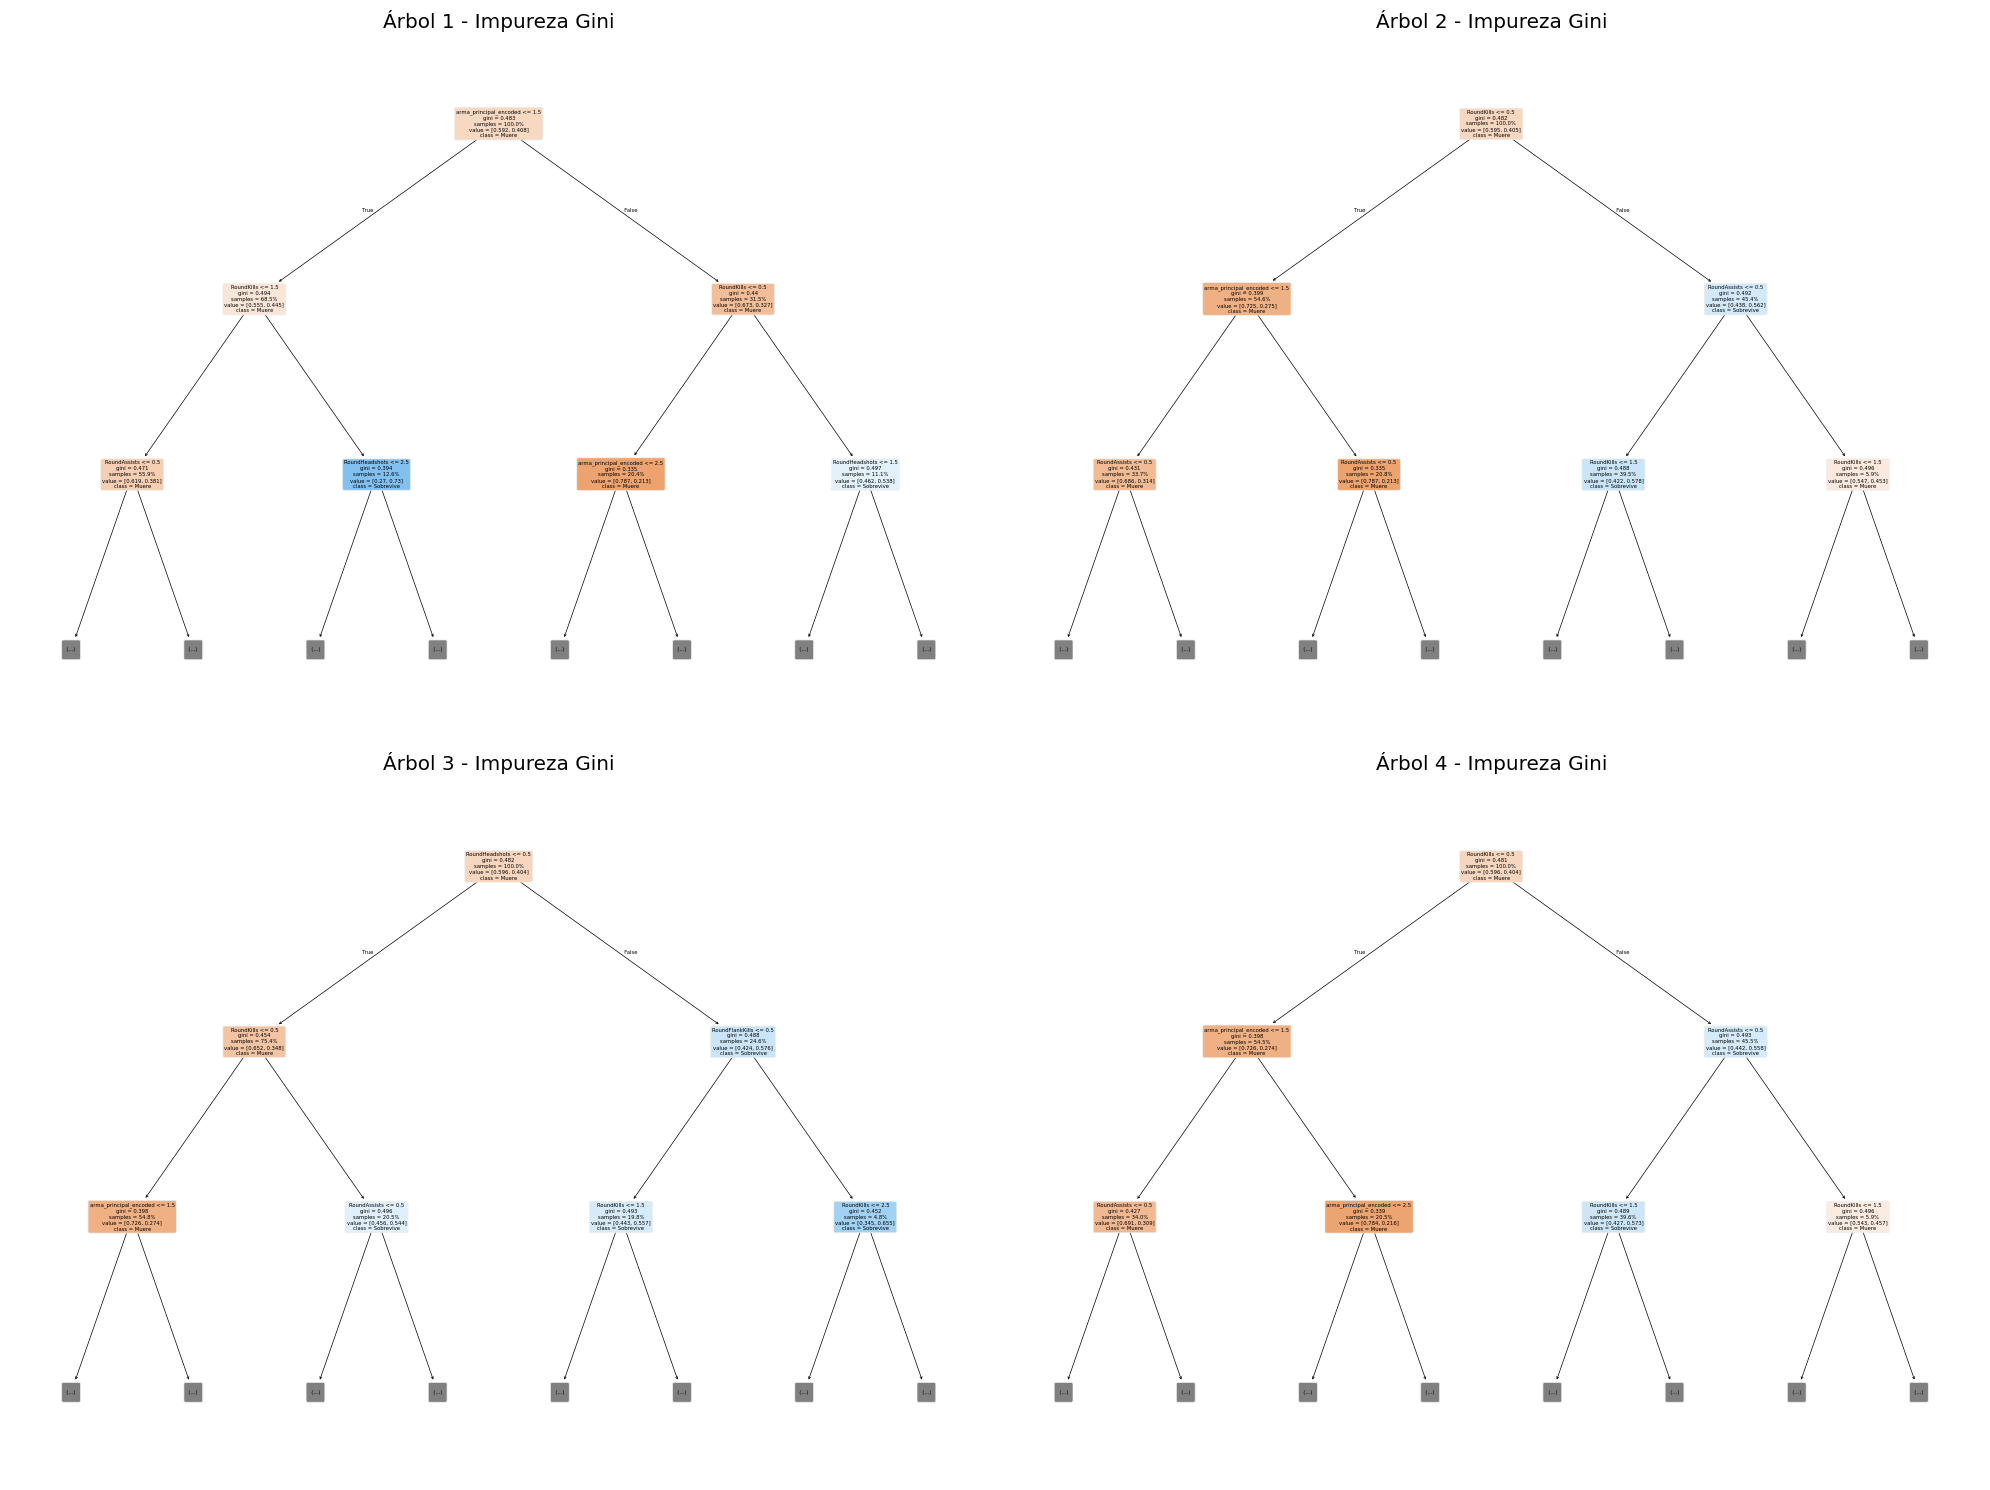

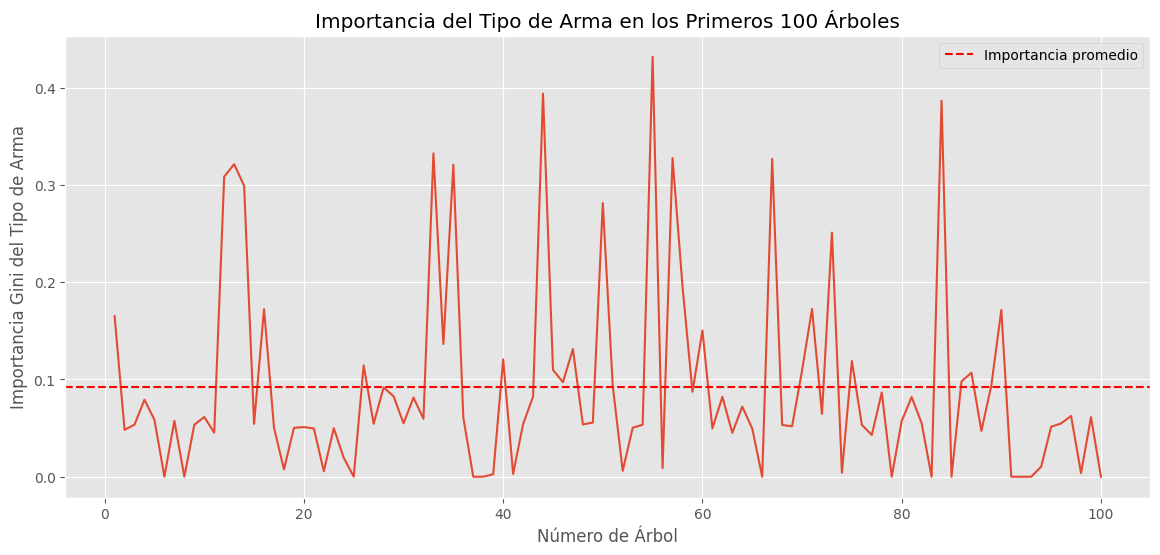


=== Comparación de reglas en diferentes árboles ===

Reglas del Árbol 1 (resumen):
|--- arma_principal_encoded <= 1.50
|   |--- RoundKills <= 1.50
|   |   |--- RoundAssists <= 0.50
|   |   |   |--- weights: [15712.00, 10430.00] class: 0.0
|   |   |--- RoundAssists >  0.50
|   |   |   |--- weights: [3473.00, 1356.00] class: 0.0
|   |--- RoundKills >  1.50
|   |   |--- RoundHeadshots <= 2.50
|   |   |   |--- weights: [1858.00, 4870.00] class: 1.0
|   |   |--- RoundHeadshots >  2.50

Reglas del Árbol 2 (resumen):
|--- RoundKills <= 0.50
|   |--- arma_principal_encoded <= 1.50
|   |   |--- RoundAssists <= 0.50
|   |   |   |--- weights: [10563.00, 5169.00] class: 0.0
|   |   |--- RoundAssists >  0.50
|   |   |   |--- weights: [2248.00, 705.00] class: 0.0
|   |--- arma_principal_encoded >  1.50
|   |   |--- RoundAssists <= 0.50
|   |   |   |--- weights: [8197.00, 2273.00] class: 0.0
|   |   |--- RoundAssists >  0.50

Reglas del Árbol 3 (resumen):
|--- RoundHeadshots <= 0.50
|   |--- RoundKi

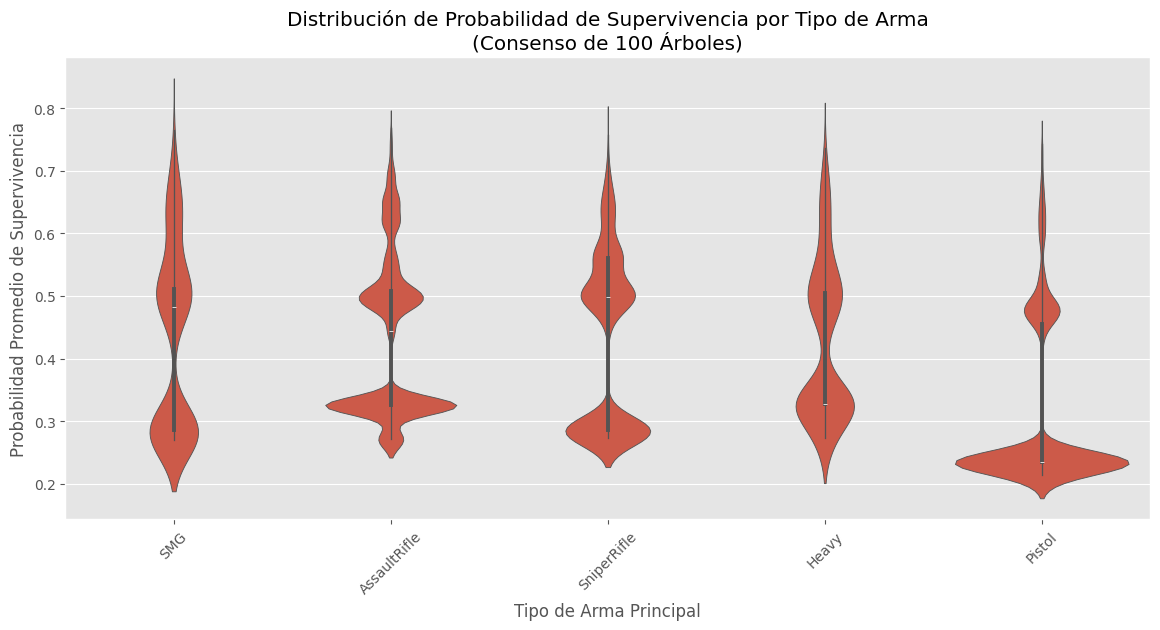

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 10)

# 1. Preparación de datos
def determinar_arma_principal(row):
    armas = {
        "AssaultRifle": row["PrimaryAssaultRifle"],
        "SniperRifle": row["PrimarySniperRifle"],
        "Heavy": row["PrimaryHeavy"],
        "SMG": row["PrimarySMG"],
        "Pistol": row["PrimaryPistol"]
    }
    return max(armas, key=armas.get)

df["arma_principal"] = df.apply(determinar_arma_principal, axis=1)
le = LabelEncoder()
df["arma_principal_encoded"] = le.fit_transform(df["arma_principal"])

# Convertir a arrays NumPy (elimina nombres de características)
y = df["Survived"].astype(int).values  # .values para convertir a array
X = df[["arma_principal_encoded", "RoundKills", "RoundAssists", "RoundHeadshots", "RoundFlankKills"]].values

# División en train/test (ya con arrays)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# 2. Modelo Random Forest con 100 árboles
rf_multi = RandomForestClassifier(
    criterion="gini",
    n_estimators=100,
    max_depth=3,
    min_samples_split=10,
    random_state=42,
    oob_score=True,
    warm_start=True
)

rf_multi.fit(X_train, y_train)

# 3. Visualización de los primeros 4 árboles
plt.figure(figsize=(20, 15))
feature_names = ["arma_principal_encoded", "RoundKills", "RoundAssists", "RoundHeadshots", "RoundFlankKills"]  # Nombres manuales

for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_tree(
        rf_multi.estimators_[i],
        feature_names=feature_names,  # Pasamos los nombres manualmente
        class_names=['Muere', 'Sobrevive'],
        filled=True,
        rounded=True,
        proportion=True,
        impurity=True,
        max_depth=2
    )
    plt.title(f"Árbol {i+1} - Impureza Gini")

plt.tight_layout()
plt.show()

# 4. Análisis de importancia por árbol
armas_importancia_por_arbol = []
feature_index = 0  # Índice de 'arma_principal_encoded' en X

for i, tree in enumerate(rf_multi.estimators_):
    importancia = tree.feature_importances_
    armas_importancia_por_arbol.append({
        'Árbol': i+1,
        'Importancia Arma': importancia[feature_index]
    })

df_arboles = pd.DataFrame(armas_importancia_por_arbol)

# 5. Visualización de importancia
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_arboles, x='Árbol', y='Importancia Arma')
plt.title('Importancia del Tipo de Arma en los Primeros 100 Árboles')
plt.xlabel('Número de Árbol')
plt.ylabel('Importancia Gini del Tipo de Arma')
plt.axhline(
    y=rf_multi.feature_importances_[feature_index],
    color='red',
    linestyle='--',
    label='Importancia promedio'
)
plt.legend()
plt.show()

# 6. Comparación de reglas de árboles
print("\n=== Comparación de reglas en diferentes árboles ===")
for i in range(3):
    tree_rules = export_text(
        rf_multi.estimators_[i],
        feature_names=feature_names,  # Nombres manuales
        show_weights=True
    )
    print(f"\nReglas del Árbol {i+1} (resumen):")
    print("\n".join(tree_rules.split("\n")[:10]))

# 7. Análisis de consenso (usamos el DataFrame original para agrupación)
df['votos_sobrevivencia'] = 0
for tree in rf_multi.estimators_:
    df['votos_sobrevivencia'] += tree.predict_proba(X)[:, 1]

df['votos_sobrevivencia'] /= len(rf_multi.estimators_)

arma_consenso = df.groupby('arma_principal')['votos_sobrevivencia'].agg(['mean', 'std'])
print("\nConsenso de supervivencia por arma (promedio de todos los árboles):")
print(arma_consenso.sort_values('mean', ascending=False))

# 8. Visualización de distribución de votos
plt.figure(figsize=(14, 6))
sns.violinplot(
    x='arma_principal',
    y='votos_sobrevivencia',
    data=df,
    order=arma_consenso.sort_values('mean', ascending=False).index
)
plt.title('Distribución de Probabilidad de Supervivencia por Tipo de Arma\n(Consenso de 100 Árboles)')
plt.ylabel('Probabilidad Promedio de Supervivencia')
plt.xlabel('Tipo de Arma Principal')
plt.xticks(rotation=45)
plt.show()

Los jugadores con pistolas tienen menor probabilidad de sobrevivir. Armas como SMG, Heavy y SniperRifle son más variables, pero pueden ofrecer mejores chances. Las AssaultRifles son más estables, aunque no garantizan alta supervivencia.


# Cálculo de métricas

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6782465891864579
Precision: 0.6312647507982785
Recall: 0.47702475870751154
F1 Score: 0.5434120107559008
AUC: 0.7027114675891959

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75     14216
           1       0.63      0.48      0.54      9532

    accuracy                           0.68     23748
   macro avg       0.66      0.65      0.65     23748
weighted avg       0.67      0.68      0.67     23748



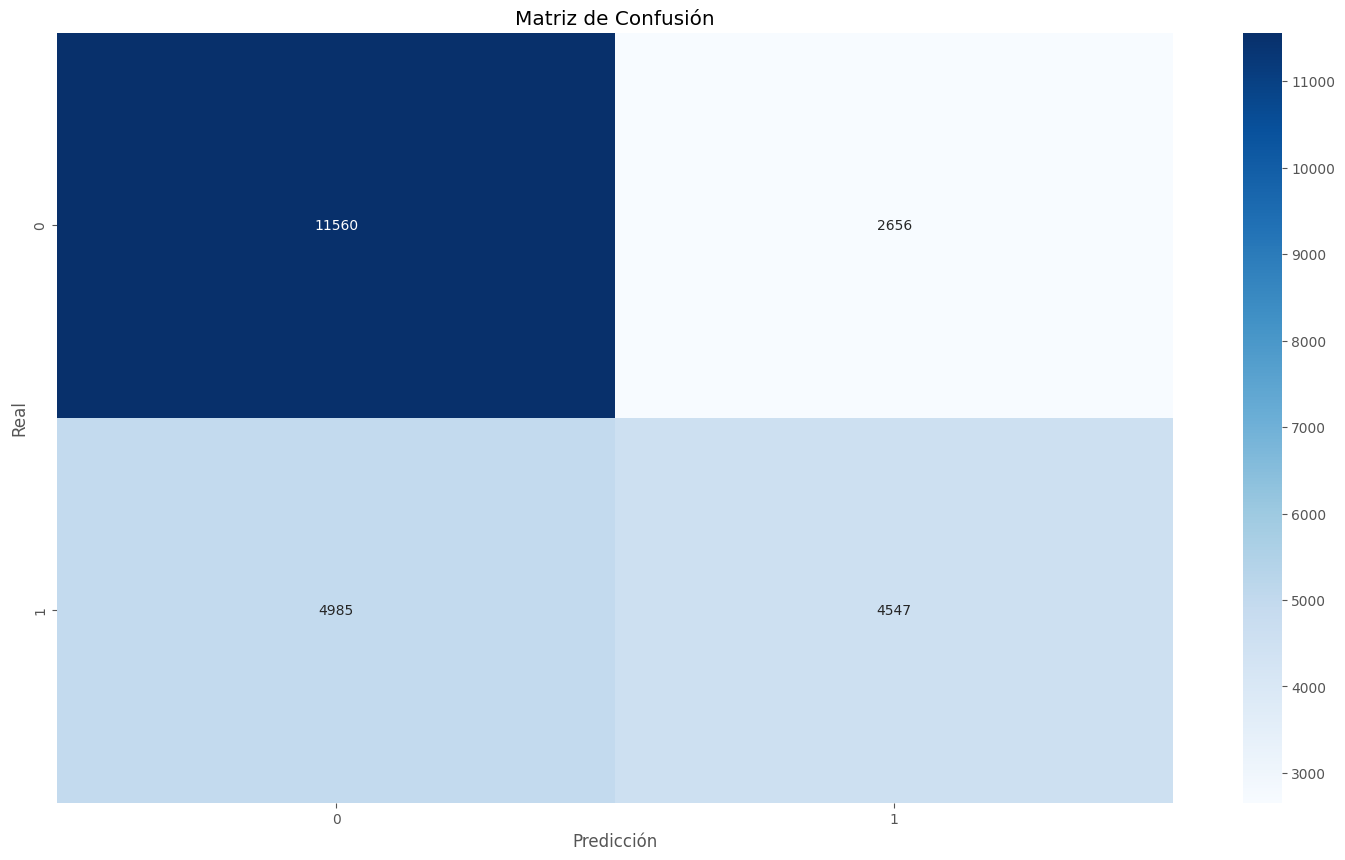

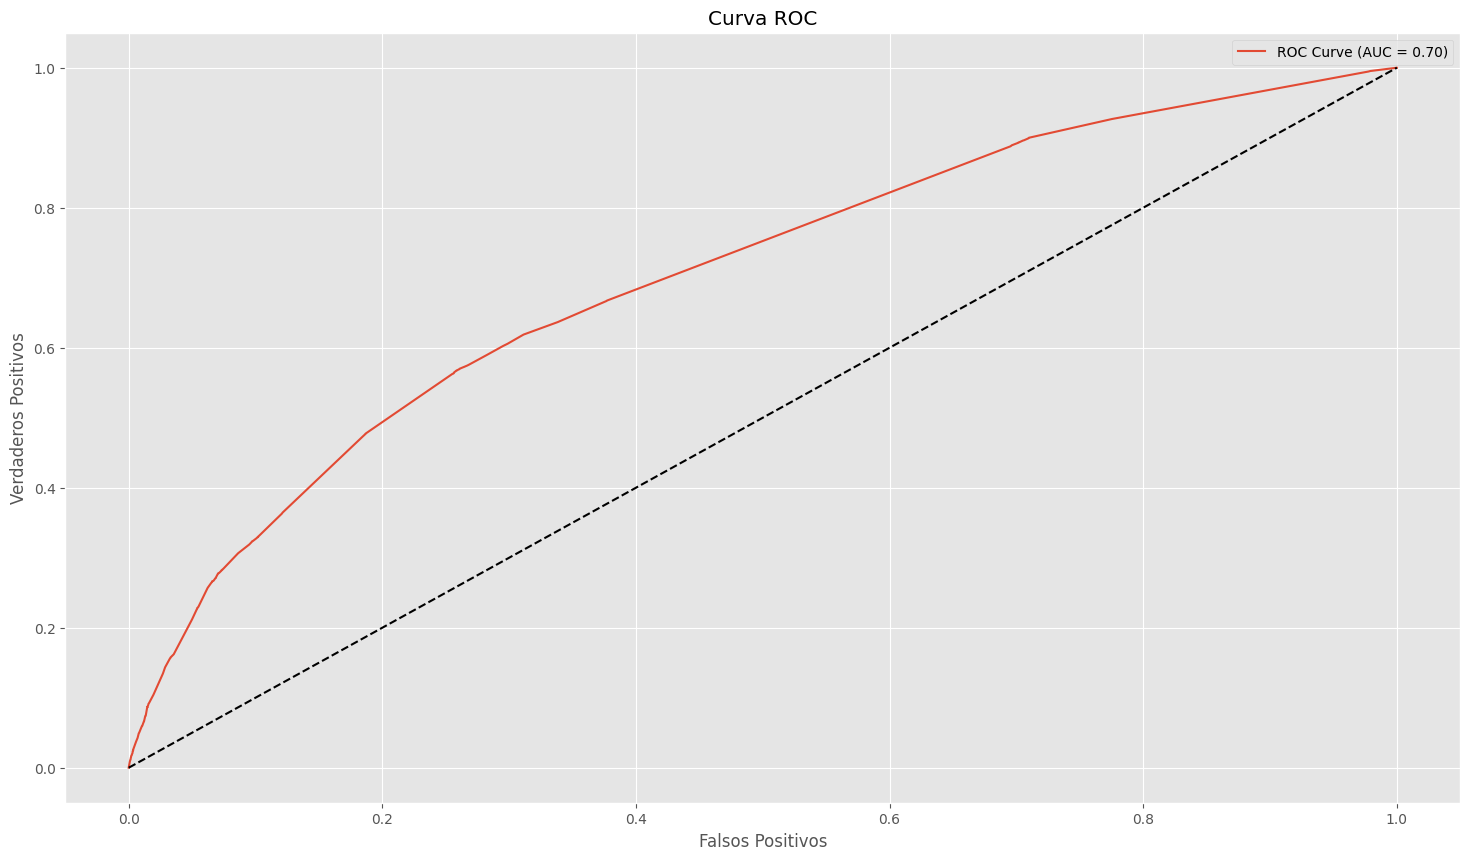

In [29]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predicción
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("AUC:", roc_auc_score(y_test, y_prob))

# Reporte detallado
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


In [30]:

from sklearn.model_selection import GridSearchCV

# Ajuste de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
mejor_modelo = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


# Conclusiones

Accuracy: 0.85, eso significa que el 85% de las veces acierta en sus predicciones.
Precisión: 0.76 → El modelo acierta el 76% de las veces que predice clase 1.
Recall:  0.90 → El modelo detectó el 90% de los verdaderos positivos.
F1-Score: F1 = 0.82 → Buen balance entre precisión y sensibilidad.
AUC y Curva ROC
ROC (Receiver Operating Characteristic) compara:

Tasa de verdaderos positivos (TPR o Recall)

Contra tasa de falsos positivos (FPR)

AUC (Área bajo la curva):

1.0 = modelo perfecto

0.5 = modelo al azar

0.8 = muy buen desempeño

Ejemplo:
AUC = 0.92 → Excelente separación entre clases. El modelo distingue bien positivos de negativos.